<a href="https://colab.research.google.com/github/dydpradeep/UptoNN/blob/main/SaturdayMeet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# create test set
from sklearn.model_selection import train_test_split

# to keep track of training time
import datetime

# standard scaler
from sklearn.preprocessing import StandardScaler

# logistic regression model
from sklearn.linear_model import LogisticRegression


# metrics used for evaluation
from sklearn.metrics import f1_score, matthews_corrcoef

# visualizations
from yellowbrick.classifier import ClassPredictionError, ConfusionMatrix
from sklearn.metrics import plot_roc_curve

# KNN imputation
from sklearn.impute import KNNImputer

# normalizer
from sklearn.preprocessing import Normalizer

# variance threshold
from sklearn.feature_selection import VarianceThreshold

# RFECV
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

# random forest
from sklearn.ensemble import RandomForestClassifier

# evaluation metric
from sklearn.metrics import matthews_corrcoef, make_scorer

import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import missingno as msno
import seaborn as sns

In [ ]:
uci_secom = pd.read_csv('uci-secom.csv')
print(f'There are {uci_secom.shape[0]} records with {uci_secom.shape[1]} features!')
n_features0 = uci_secom.shape[1]

There are 1567 records with 592 features!


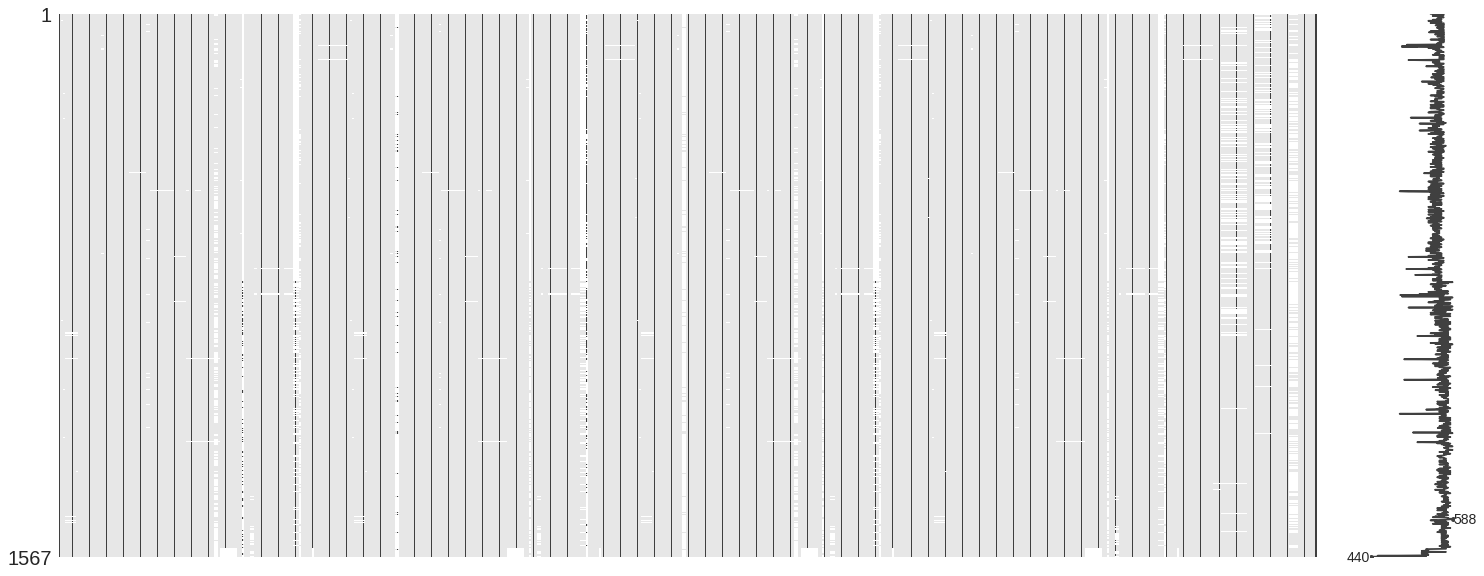

In [ ]:
msno.matrix(uci_secom);

In [ ]:
uci_secom.isnull().sum().sum()

41951

In [ ]:
uci_secom.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


In [ ]:
uci_secom.dtypes.value_counts()

float64    590
object       1
int64        1
dtype: int64

In [ ]:
Counter(uci_secom['Pass/Fail'])

Counter({-1: 1463, 1: 104})

In [ ]:
uci_secom['year'] = pd.DatetimeIndex(uci_secom['Time']).year
uci_secom['month'] = pd.DatetimeIndex(uci_secom['Time']).month
uci_secom['date'] = pd.DatetimeIndex(uci_secom['Time']).day
uci_secom['week_day'] = pd.DatetimeIndex(uci_secom['Time']).weekday
uci_secom['start_time'] = pd.DatetimeIndex(uci_secom['Time']).time
uci_secom['hour'] = pd.DatetimeIndex(uci_secom['Time']).hour
uci_secom['min'] = pd.DatetimeIndex(uci_secom['Time']).minute
uci_secom=uci_secom.drop('Time',axis=1)

In [ ]:
uci_secom.head()

,0,1,2,3,4,5,6,7,8,9,...,588,589,Pass/Fail,year,month,date,week_day,start_time,hour,min
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,-1,2008,7,19,5,11:55:00,11,55
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,-1,2008,7,19,5,12:32:00,12,32
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,1,2008,7,19,5,13:17:00,13,17
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,-1,2008,7,19,5,14:43:00,14,43
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0044,73.8432,-1,2008,7,19,5,15:22:00,15,22


In [ ]:
uci_secom.year.unique()

array([2008])

In [ ]:
uci_secom.month.unique()

array([ 7,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [ ]:
uci_secom.date.unique()

array([19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31,  8, 13, 15, 16, 17, 18,
       24,  9, 14, 26, 10])

In [ ]:
uci_secom.week_day.unique()

array([5, 6, 0, 1, 2, 4, 3])

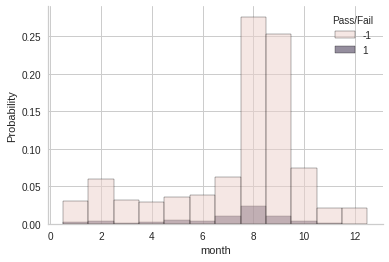

In [ ]:
sns.histplot(data=uci_secom, x="month", hue="Pass/Fail",stat="probability", discrete=True,);
sns.despine(right=True,top=True)

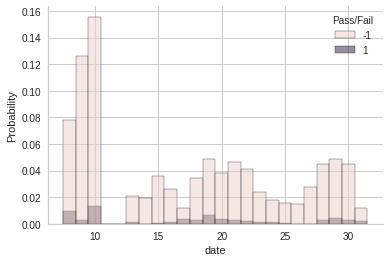

In [ ]:
sns.histplot(data=uci_secom, x="date", hue="Pass/Fail",stat="probability", discrete=True,);
sns.despine(right=True,top=True)

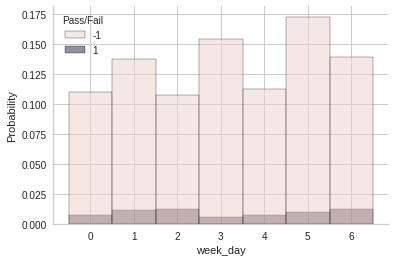

In [ ]:
sns.histplot(data=uci_secom, x="week_day", hue="Pass/Fail",stat="probability", discrete=True,);
sns.despine(right=True,top=True)

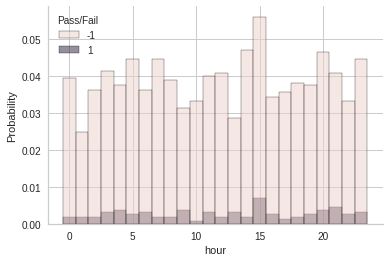

In [ ]:
sns.histplot(data=uci_secom, x="hour", hue="Pass/Fail",stat="probability", discrete=True,);
sns.despine(right=True,top=True)

In [ ]:
uni_target = uci_secom[['Pass/Fail']]
uni_data = uci_secom.drop(['Pass/Fail'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(uni_data, uni_target, test_size=0.25, random_state=42, stratify=uni_target)

In [ ]:

X_train = pd.DataFrame(X_train, columns=uni_data.columns)
X_test = pd.DataFrame(X_test, columns=uni_data.columns)
y_train = pd.DataFrame(y_train, columns=uni_target.columns)
y_test = pd.DataFrame(y_test, columns=uni_target.columns)

In [ ]:
y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [ ]:
type_dct = {str(k): len(list(v)) for k, v in X_train.groupby(X_train.dtypes, axis=1)}
type_dct

{'float64': 590, 'int64': 6, 'object': 1}

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,587,588,589,year,month,date,week_day,start_time,hour,min
160,3057.03,2468.41,2184.8778,960.8486,1.0160,100.0,102.5333,0.1214,1.4549,-0.0125,...,0.0121,0.0048,62.1248,2008,8,8,4,21:22:00,21,22
814,3012.09,2551.08,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5136,-0.0090,...,0.0069,0.0021,62.3602,2008,12,9,1,20:28:00,20,28
124,3032.81,2534.74,2239.4223,1997.3782,1.5397,100.0,98.3356,0.1229,1.4974,-0.0046,...,0.0086,0.0027,35.5550,2008,5,8,3,21:22:00,21,22
501,2987.72,2550.52,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.4207,0.0016,...,0.0226,0.0079,474.0812,2008,8,29,4,00:49:00,0,49
1362,3001.90,2465.51,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.4201,-0.0182,...,0.0077,0.0025,42.5048,2008,6,10,1,13:08:00,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,3185.69,2537.68,2173.2778,1116.2950,0.8525,100.0,103.8200,0.1237,1.4653,-0.0204,...,0.0095,0.0028,41.2178,2008,2,10,6,17:19:00,17,19
365,2988.92,2460.91,2178.0778,941.9524,0.8039,100.0,104.0167,0.1229,1.5829,-0.0278,...,0.0135,0.0045,46.4165,2008,8,21,3,15:32:00,15,32
1420,2975.74,2517.35,2162.5556,1041.0369,1.4305,100.0,100.4111,0.1238,1.4968,-0.0201,...,0.0071,0.0020,23.6431,2008,8,10,6,10:37:00,10,37
113,2928.16,2523.21,2210.6111,1184.6481,1.2577,100.0,102.9356,0.1201,1.4453,-0.0126,...,0.0144,0.0047,293.2614,2008,5,8,3,06:21:00,6,21


In [ ]:
X_train_notime = X_train.drop(['year','month','date','week_day','start_time','hour','min'], axis=1)
X_test_notime = X_test.drop(['year','month','date','week_day','start_time','hour','min'], axis=1)

In [ ]:
np.count_nonzero(X_train_notime.isna().sum())

462

In [ ]:
X_train_notime.isna().sum().sort_values(ascending=False).head(10)

292    1062
293    1062
157    1062
158    1062
358    1004
492    1004
220    1004
85     1004
383     780
384     780
dtype: int64

In [ ]:
def evaluate(train_df, test_df, train_target, test_target):
    
    # first, we should scale our data so logistic regression works better
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
    
    # training the model
    logreg = LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear')
    start_time = datetime.datetime.now()
    logreg.fit(train_std, train_target.values.ravel())
    elapsed = datetime.datetime.now() - start_time
    time = int(elapsed.total_seconds()*1000)
    
    
    # evaluation and scoring
    y_pred = logreg.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)
    
    
    
    # visualizations
    cre = ClassPredictionError(logreg, classes=['fail', 'pass'])
    cre.score(test_std, y_true)
    cre.show()
    cm = ConfusionMatrix(logreg, classes=['fail', 'pass'])
    cm.score(test_std, y_true)
    cm.show()
    rocauc = plot_roc_curve(logreg, test_std, y_true)
    plt.show()
    
    return time, f1score, mccscore

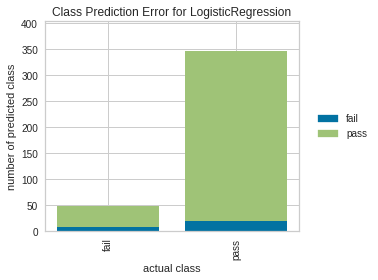

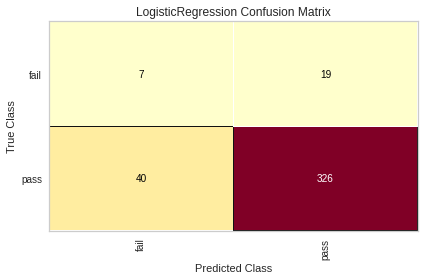

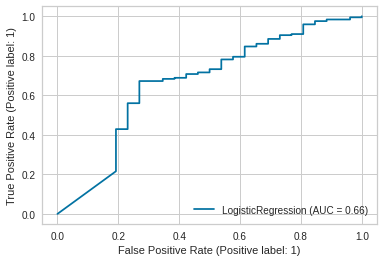

 Training time: 897ms
 F1 Score: 0.8494897959183674
 MCC Score: 0.12252619848733756


In [ ]:
# impute missing values and save it as a temporary dataset.
imputer = KNNImputer()
imputer.fit(X_train_notime)
imputed_train = pd.DataFrame(imputer.transform(X_train_notime), columns = X_train_notime.columns)
imputed_test = pd.DataFrame(imputer.transform(X_test_notime), columns = X_test_notime.columns)

# lists to record time and scores
f1scores = []
mccscores = []
times = []

time, f1score, mccscore = evaluate(train_df = imputed_train, test_df = imputed_test, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

In [ ]:
def percentna(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold]
    return columns.tolist()

In [ ]:
na_columns = percentna(X_train, 0.25)
X_train_nona = X_train_notime.drop(na_columns, axis=1)
X_test_nona = X_test_notime.drop(na_columns, axis=1)
n_features1 = X_train_nona.shape[1]
print(f'After removing {len(na_columns)} features, there are {n_features1} features left.')

After removing 52 features, there are 538 features left.


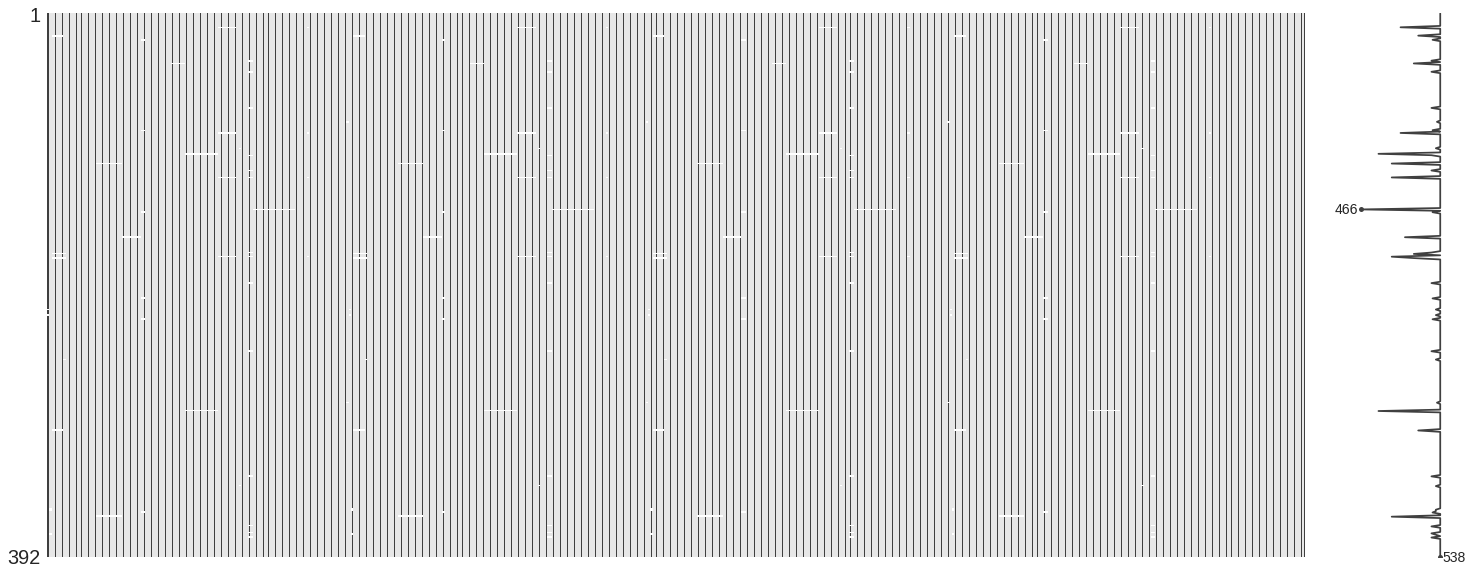

In [ ]:
msno.matrix(X_test_nona);

In [ ]:
imputer = KNNImputer()
imputer.fit(X_train_nona)

KNNImputer()

In [ ]:
X_train_imp = pd.DataFrame(imputer.transform(X_train_nona), columns = X_train_nona.columns)
X_test_imp = pd.DataFrame(imputer.transform(X_test_nona), columns = X_test_nona.columns)

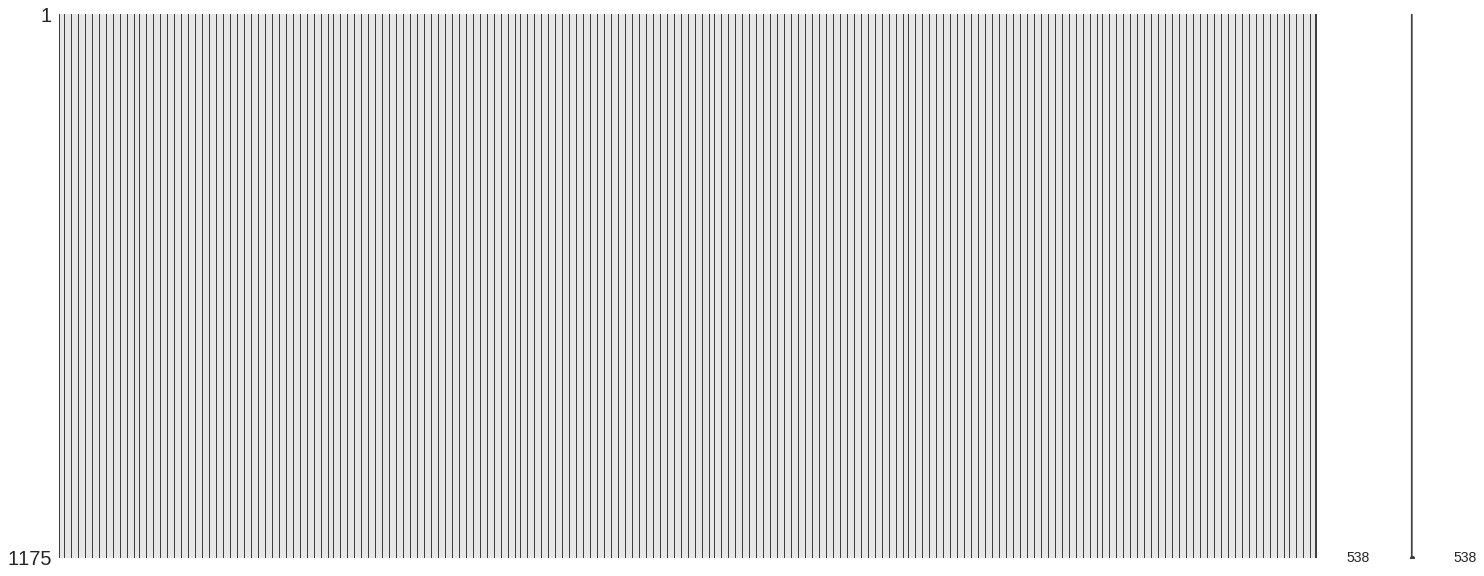

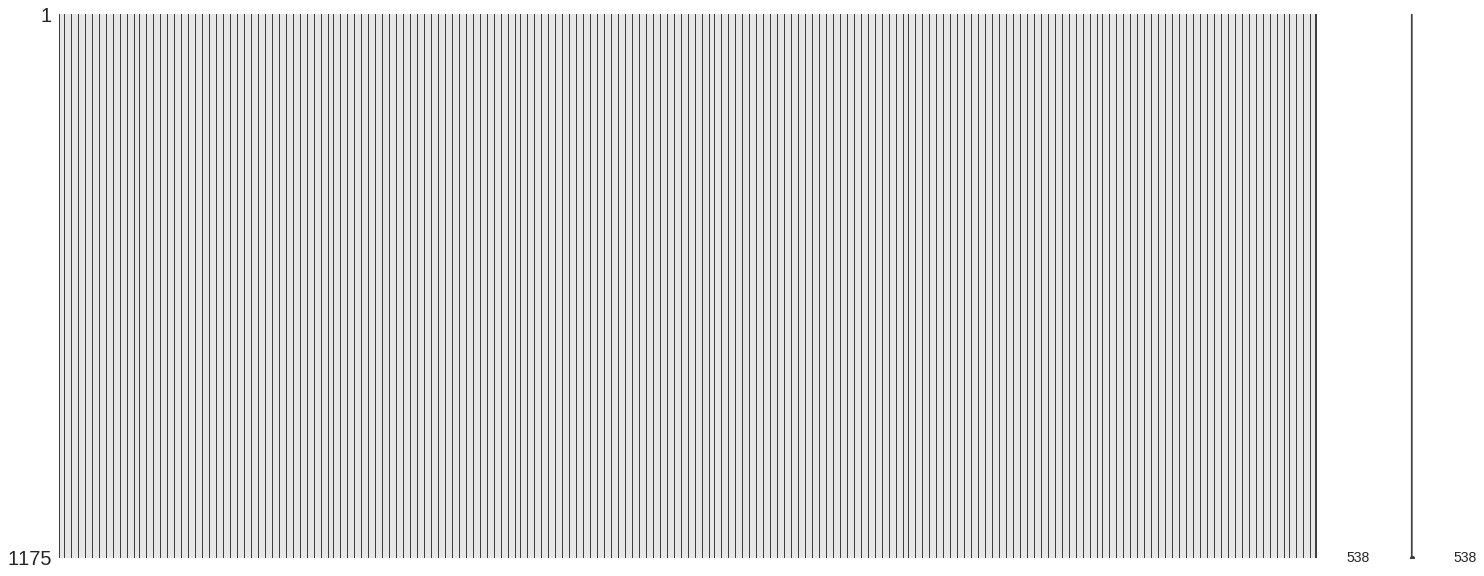

In [ ]:
msno.matrix(X_train_imp);
msno.matrix(X_train_imp);

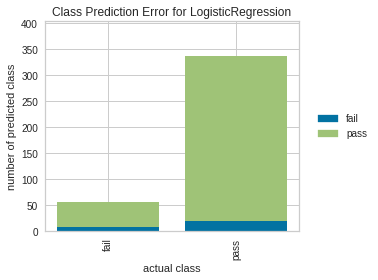

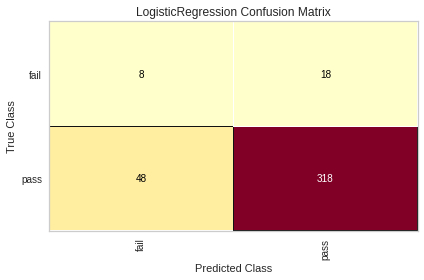

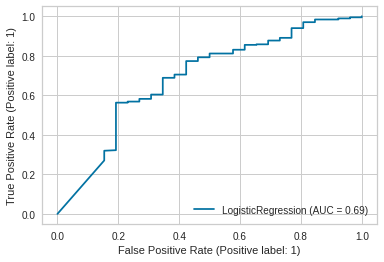

 Training time: 788ms
 F1 Score: 0.8316326530612244
 MCC Score: 0.12555049023795634


In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_imp, test_df = X_test_imp, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

In [ ]:
normalizer = Normalizer()
normalizer.fit(X_train_imp)

Normalizer()

In [ ]:
X_train_nrm = pd.DataFrame(normalizer.transform(X_train_imp), columns = X_train_imp.columns)
X_test_nrm = pd.DataFrame(normalizer.transform(X_test_imp), columns = X_test_imp.columns)

In [ ]:
selector = VarianceThreshold()
selector.fit(X_train_nrm)

VarianceThreshold()

In [ ]:
mask = selector.get_support()
columns = X_train_nrm.columns
selected_cols = columns[mask]
n_features2 = len(selected_cols)
print(f'remaining features: {n_features2}')

remaining features: 426


In [ ]:
X_train_var = pd.DataFrame(selector.transform(X_train_imp), columns = selected_cols)
X_test_var = pd.DataFrame(selector.transform(X_test_imp), columns = selected_cols)

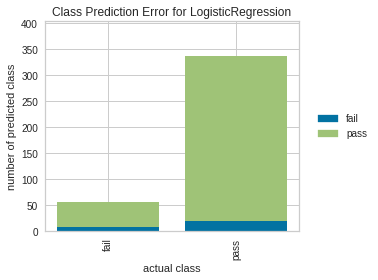

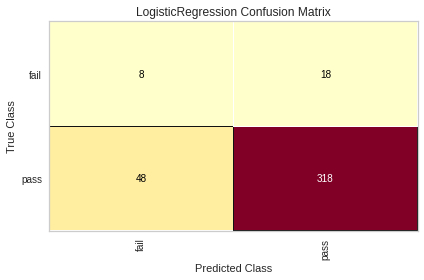

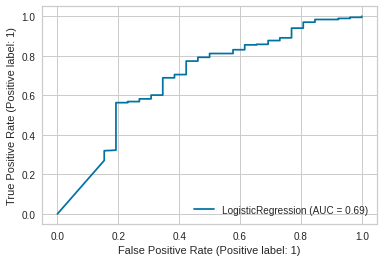

 Training time: 900ms
 F1 Score: 0.8316326530612244
 MCC Score: 0.12555049023795634


In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_var, test_df = X_test_var, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train_var, 0.95)
X_train_corr = X_train_var.drop(corr_features, axis=1)
X_test_corr = X_test_var.drop(corr_features, axis=1)
n_features3 = X_train_corr.shape[1]
print(f'After removing {len(corr_features)} features, there are {n_features3} features left.')

After removing 171 features, there are 255 features left.


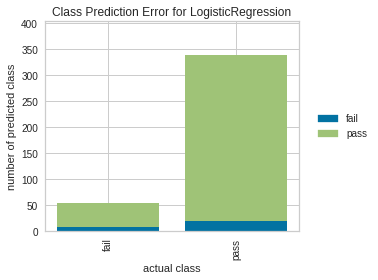

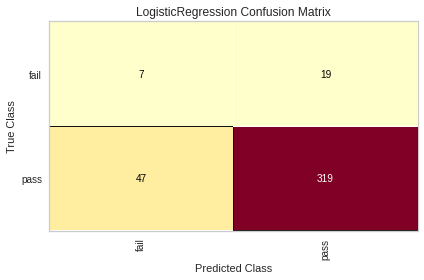

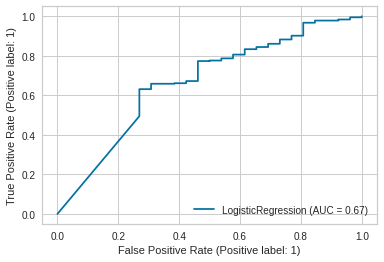

 Training time: 631ms
 F1 Score: 0.8316326530612244
 MCC Score: 0.10167691287031014


In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_corr, test_df = X_test_corr, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

In [ ]:
def corrwith_target(dataframe, target, threshold):
    cor = dataframe.corr()
    #Correlation with output variable
    cor_target = abs(cor[target])
    #Selecting non correlated features
    relevant_features = cor_target[cor_target<threshold]
    return relevant_features.index.tolist()[:-1]

In [ ]:
# in order to find the correlation with target, I have to add target as a column to X_train_corr
dummy_train = X_train_corr.copy()
dummy_train['target'] = y_train

In [ ]:
corrwith_cols = corrwith_target(dummy_train, 'target', 0.05)
X_train_corw = X_train_corr.drop(corrwith_cols, axis=1)
X_test_corw = X_test_corr.drop(corrwith_cols, axis=1)
n_features4 = X_train_corw.shape[1]
print(f'After removing {len(corrwith_cols)} features, there are {n_features4} features left.')

After removing 213 features, there are 42 features left.


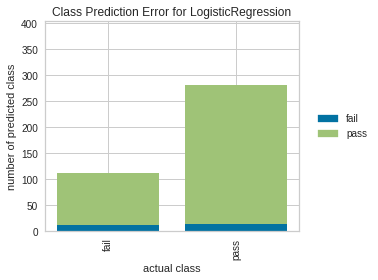

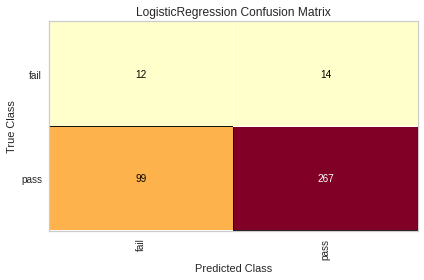

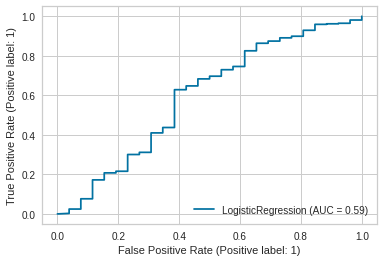

 Training time: 173ms
 F1 Score: 0.7117346938775511
 MCC Score: 0.1055241865126554


In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_corw, test_df = X_test_corw, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

In [ ]:
from scipy import stats

def outliers_high(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    feat = np.where(feat > q3+ stats.iqr(feat),q2,feat)
    return feat

def outliers_low(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    feat = np.where(feat < q1 - stats.iqr(feat),q2,feat)
    return feat

In [ ]:
X_train_corw

,5,7,20,42,43,46,49,50,51,58,...,337,468,473,474,476,487,489,583,587,589
0,100.0,0.1214,1.3864,70.0,350.5018,733.5702,1.0,635.6891,224.2298,4.6760,...,1.50360,31.81870,18.37930,19.0785,47.95890,106.9136,509.0164,0.0126,0.0121,62.1248
1,100.0,0.1242,1.4087,70.0,357.5045,728.1839,1.0,626.2327,119.6453,4.5863,...,2.62516,184.97862,57.55982,43.6415,17.42282,35.8040,155.2124,0.0073,0.0069,62.3602
2,100.0,0.1229,1.4055,70.0,361.9427,745.7312,1.0,641.1964,195.2785,4.5140,...,1.63510,24.01360,64.85840,36.5861,37.41840,771.3626,170.7463,0.0149,0.0086,35.5550
3,100.0,0.1222,1.4070,70.0,350.7564,729.2869,1.0,627.4191,199.6725,4.5319,...,2.66950,0.00000,40.17510,45.2676,14.38330,67.6095,507.7364,0.0099,0.0226,474.0812
4,100.0,0.1229,1.4312,70.0,347.7727,738.7064,1.0,631.4236,73.7388,4.5467,...,2.29530,328.38900,45.22420,44.4064,14.29530,918.9504,146.4452,0.0085,0.0077,42.5048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,100.0,0.1237,1.3985,70.0,353.7491,745.2585,1.0,636.3645,151.6885,4.5226,...,2.69810,318.02940,42.57090,35.0293,7.19670,291.9852,154.6846,0.0104,0.0095,41.2178
1171,100.0,0.1229,1.3976,70.0,355.8500,732.3170,1.0,629.2473,120.3915,4.5251,...,1.10530,85.87270,22.13710,24.4313,14.89250,79.9238,136.8263,0.0148,0.0135,46.4165
1172,100.0,0.1238,1.3863,70.0,345.6836,730.0720,1.0,628.2700,217.0850,4.5655,...,2.04420,368.25470,34.97880,28.6131,23.07320,420.3562,98.8593,0.0115,0.0071,23.6431
1173,100.0,0.1201,1.3922,70.0,365.2182,738.7691,1.0,635.7527,136.6066,4.6615,...,2.62850,50.80130,36.75280,25.9043,10.15270,80.0697,82.2571,0.0160,0.0144,293.2614


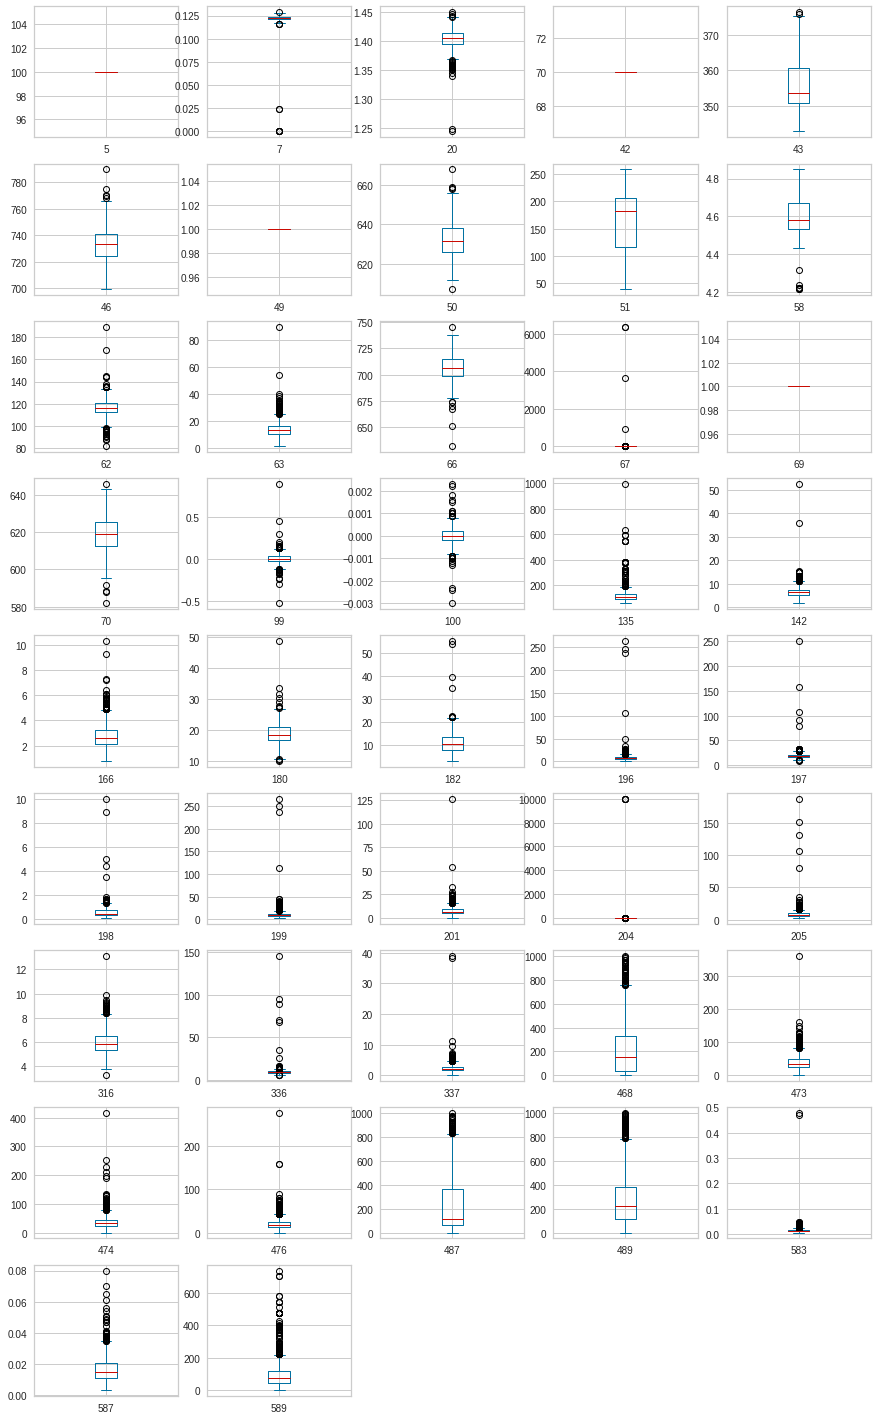

In [ ]:
X_train_corw.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

In [ ]:
X_train_outlayer=X_train_corw.copy()
for column in X_train_corw:
    X_train_outlayer[column] = outliers_high(X_train_outlayer[column])
    X_train_outlayer[column] = outliers_low(X_train_outlayer[column])

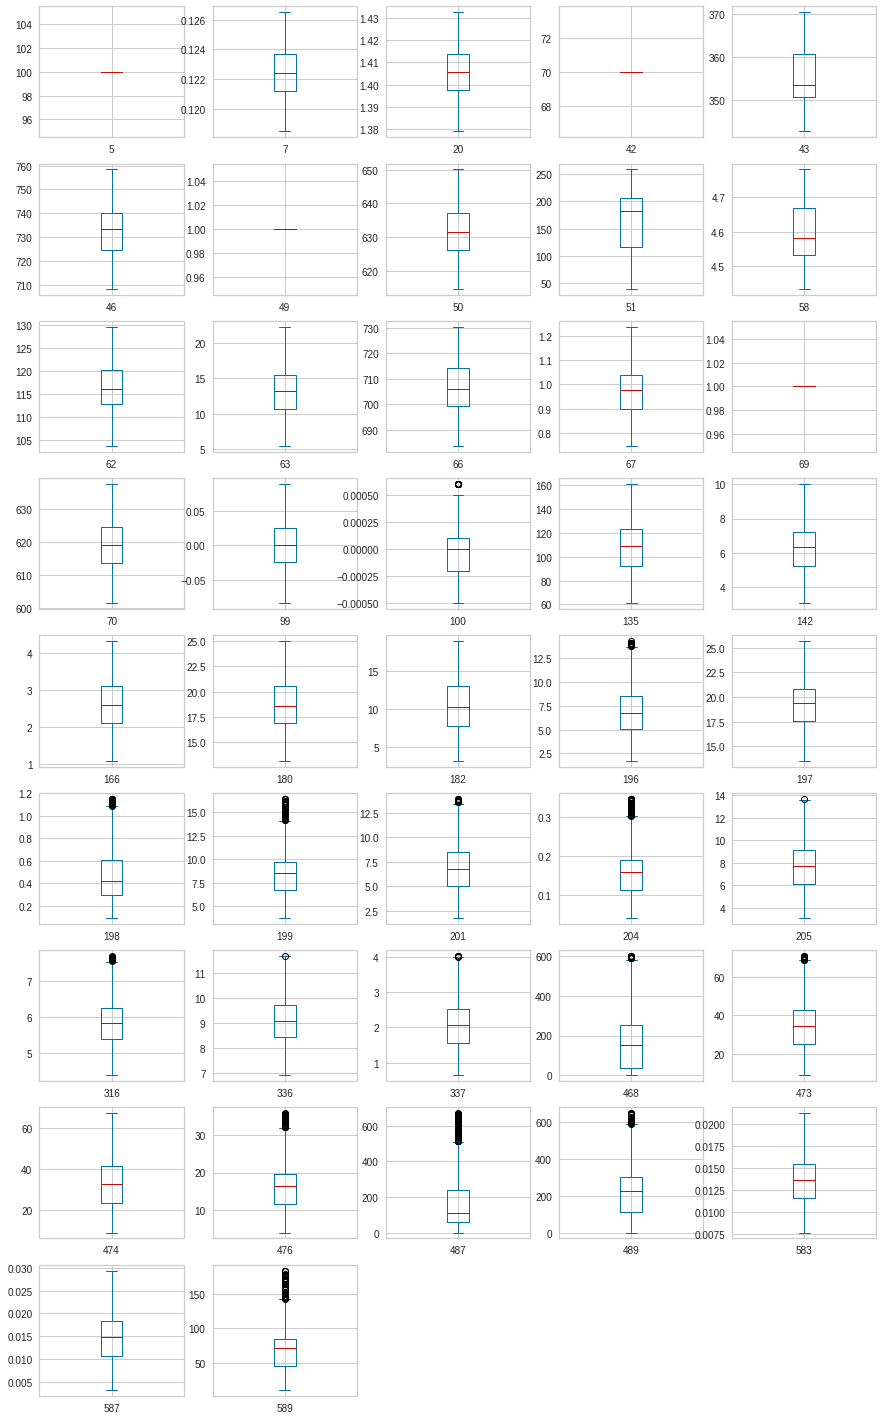

In [ ]:
X_train_outlayer.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

In [ ]:
X_test_outlayer=X_test_corw.copy()
for column in X_test_corw:
    X_test_outlayer[column] = outliers_high(X_test_outlayer[column])
    X_test_outlayer[column] = outliers_low(X_test_outlayer[column])

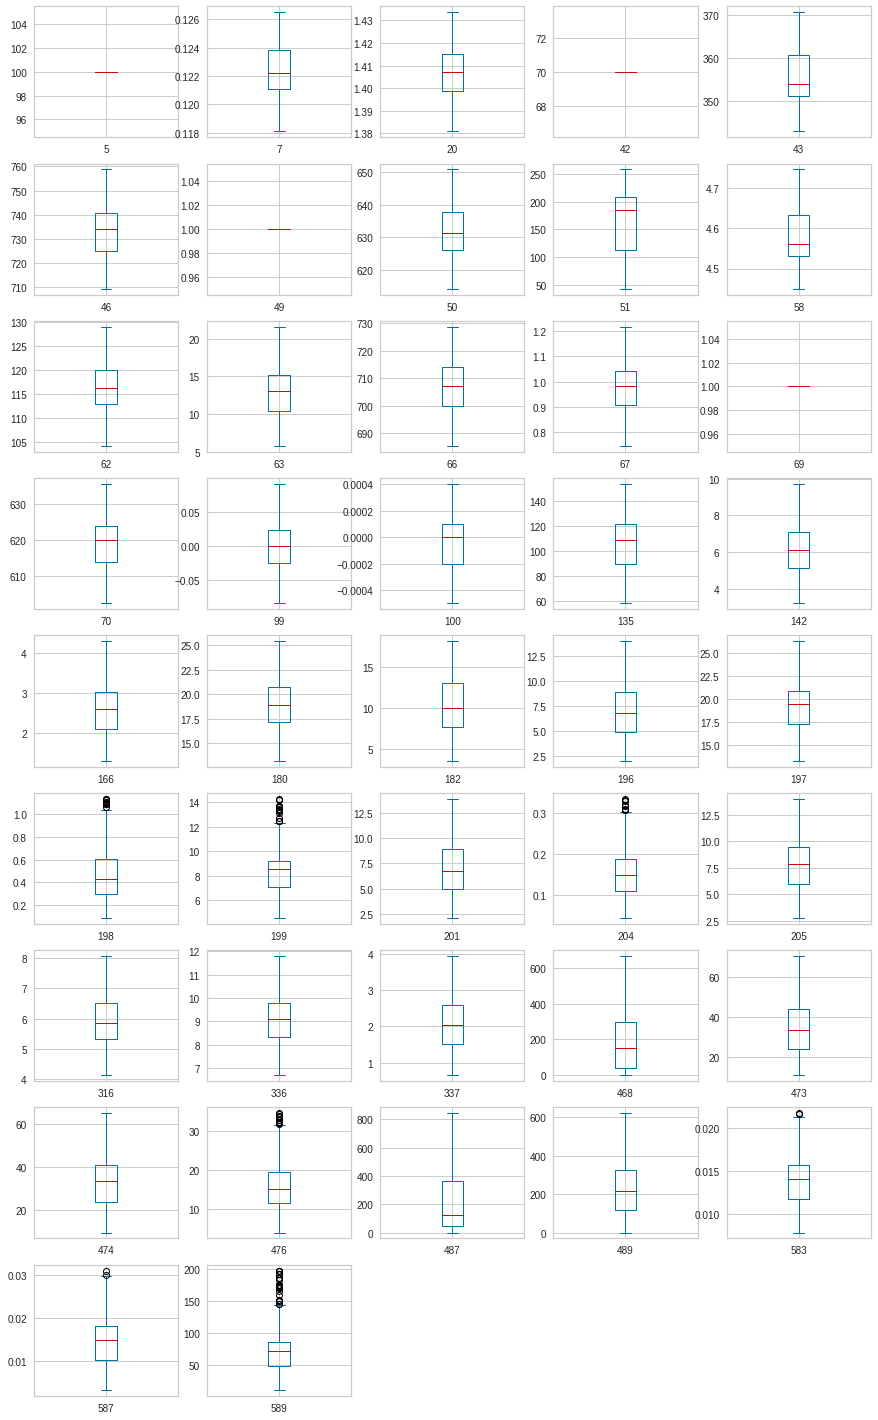

In [ ]:
X_test_outlayer.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_outlayer)

StandardScaler()

In [ ]:
X_train_std = pd.DataFrame(scaler.transform(X_train_outlayer), columns=X_train_corw.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test_outlayer), columns=X_test_corw.columns)

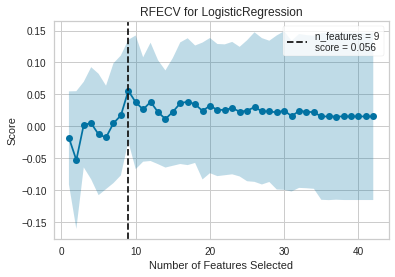

In [ ]:
mcc_scorer = make_scorer(matthews_corrcoef)
rfecv = RFECV(estimator=LogisticRegression(random_state = 123, class_weight='balanced', C=200, dual=False, solver='liblinear'),
              cv=StratifiedKFold(10),
              scoring =  mcc_scorer)
rfecv.fit(X_train_std, y_train.values.ravel())
rfecv.show()

In [ ]:
mask = rfecv.get_support()
columns = X_train_corw.columns
selected_cols = columns[mask]
n_features5 = len(selected_cols)
X_train_rfe = pd.DataFrame(rfecv.transform(X_train_outlayer), columns = selected_cols)
X_test_rfe = pd.DataFrame(rfecv.transform(X_test_outlayer), columns = selected_cols)

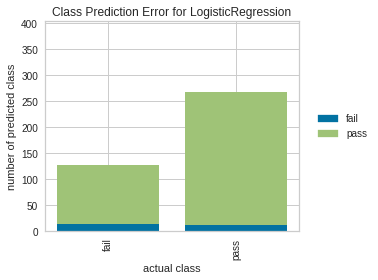

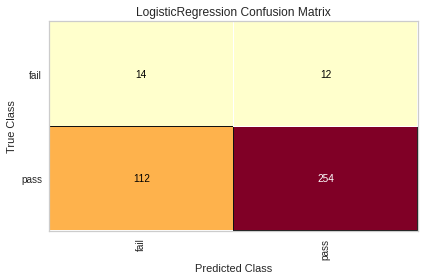

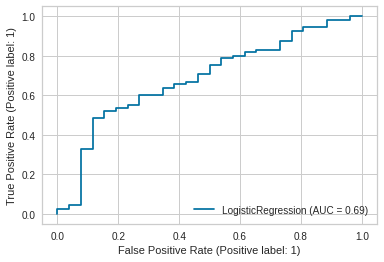

 Training time: 4ms
 F1 Score: 0.6836734693877551
 MCC Score: 0.12386021087634233


In [ ]:
time, f1score, mccscore = evaluate(train_df = X_train_rfe, test_df = X_test_rfe, train_target=y_train, test_target=y_test)
print(f' Training time: {time}ms\n F1 Score: {f1score}\n MCC Score: {mccscore}')
f1scores.append(f1score)
mccscores.append(mccscore)
times.append(time)

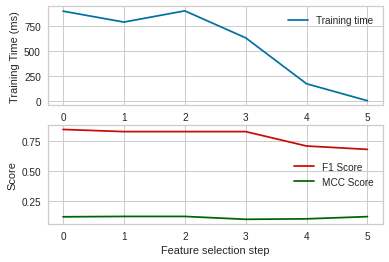

In [ ]:
fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(times, label='Training time')
ax0.set(ylabel='Training Time (ms)')
ax1.plot(f1scores, label='F1 Score', c='r')
ax1.plot(mccscores, label='MCC Score', c='darkgreen')
ax1.set(ylabel='Score')
ax1.set(xlabel='Feature selection step')
ax1.legend()
ax0.legend()
fig.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(random_state=1)
X_train_os, y_train_os = oversampler.fit_resample(X_train_rfe, y_train)

In [ ]:
X_train_os

,58,100,180,196,197,201,336,468,587
0,4.6760,-0.0001,16.56,4.660,17.600,4.660,8.37430,31.81870,0.0121
1,4.5863,0.0000,17.63,9.486,17.456,9.486,8.85618,184.97862,0.0069
2,4.5140,-0.0001,18.15,7.010,21.380,7.010,11.50580,24.01360,0.0086
3,4.5319,0.0000,17.46,7.970,19.370,7.970,10.57190,0.00000,0.0226
4,4.5467,-0.0005,17.93,7.950,18.020,7.950,8.43290,328.38900,0.0077
...,...,...,...,...,...,...,...,...,...
2189,4.5499,0.0006,16.05,11.060,19.320,11.060,11.00020,590.29540,0.0210
2190,4.6336,-0.0002,21.97,4.150,22.480,4.150,9.97440,30.62320,0.0262
2191,4.6842,0.0001,15.09,9.440,16.330,9.440,7.73060,244.04230,0.0133
2192,4.6326,0.0001,15.00,10.390,20.000,10.390,8.44550,87.86810,0.0093


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train_rfe

,58,100,180,196,197,201,336,468,587
0,4.6760,-0.0001,16.56,4.660,17.600,4.660,8.37430,31.81870,0.0121
1,4.5863,0.0000,17.63,9.486,17.456,9.486,8.85618,184.97862,0.0069
2,4.5140,-0.0001,18.15,7.010,21.380,7.010,11.50580,24.01360,0.0086
3,4.5319,0.0000,17.46,7.970,19.370,7.970,10.57190,0.00000,0.0226
4,4.5467,-0.0005,17.93,7.950,18.020,7.950,8.43290,328.38900,0.0077
...,...,...,...,...,...,...,...,...,...
1170,4.5226,0.0004,17.61,9.830,22.630,9.830,9.73300,318.02940,0.0095
1171,4.5251,0.0000,18.70,3.520,18.110,3.520,9.83780,85.87270,0.0135
1172,4.5655,0.0003,20.68,7.730,15.590,7.730,10.33120,368.25470,0.0071
1173,4.6615,0.0000,18.16,8.530,17.390,8.530,8.07860,50.80130,0.0144


In [ ]:
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.metrics import accuracy_score
 import sklearn.metrics as metrics

In [ ]:
DT = LogisticRegression()
## Training DT
DT = DT.fit(X_train_os, y_train_os)
## Predicting response on Test
y_pred = DT.predict(X_test_rfe)
DT_A2 = metrics.accuracy_score(y_test, y_pred)*100
DT_R2 = metrics.recall_score(y_test, y_pred)*100
DT_P2 = metrics.precision_score(y_test, y_pred)*100
DT_F2 = metrics.f1_score(y_test, y_pred)*100
print('Accuracy: %.2f%% ' % DT_A2)
print("Recall_Accuracy: %.2f%%" % DT_R2)
print("Precision_Accuracy: %.2f%%" % DT_P2)
print("F1 Score: %.2f%%" % DT_F2 )

Accuracy: 67.09%


In [ ]:
## Decision Tree
DT = DecisionTreeClassifier()
## Training DT
DT = DT.fit(X_train_os, y_train_os)
## Predicting response on Test
y_pred = DT.predict(X_test_rfe)
DT_A2 = metrics.accuracy_score(y_test, y_pred)*100
DT_R2 = metrics.recall_score(y_test, y_pred)*100
DT_P2 = metrics.precision_score(y_test, y_pred)*100
DT_F2 = metrics.f1_score(y_test, y_pred)*100
print('Accuracy: %.2f%% ' % DT_A2)
print("Recall_Accuracy: %.2f%%" % DT_R2)
print("Precision_Accuracy: %.2f%%" % DT_P2)
print("F1 Score: %.2f%%" % DT_F2 )

Accuracy: 88.52% 
Recall_Accuracy: 93.72%
Precision_Accuracy: 93.97%
F1 Score: 93.84%


In [ ]:
from xgboost import XGBClassifier

In [ ]:
## XGB Boost
XGB = XGBClassifier()
## Training Model
XGB = XGB.fit(X_train_os, y_train_os)
## Predicting response on Test
y_pred = XGB.predict(X_test_rfe)
XGB_A2 = metrics.accuracy_score(y_test, y_pred)*100
XGB_R2 = metrics.recall_score(y_test, y_pred)*100
XGB_P2 = metrics.precision_score(y_test, y_pred)*100
XGB_F2 = metrics.f1_score(y_test, y_pred)*100
print("Accuracy: %.2f%%" % XGB_A2)
print("Recall_Accuracy: %.2f%%" % XGB_R2)
print("Precision_Accuracy: %.2f%%" % XGB_P2)
print("F1 Score: %.2f%%" %XGB_F2)

Accuracy: 84.18%
Recall_Accuracy: 87.70%
Precision_Accuracy: 94.97%
F1 Score: 91.19%


In [ ]:
## Random Forest
RF = RandomForestClassifier() 
## Training Model
RF = RF.fit(X_train_os, y_train_os)
## Predicting response on Test
y_pred = RF.predict (X_test_rfe)
RF_A2 = metrics.accuracy_score(y_test, y_pred)*100
RF_R2 = metrics.recall_score(y_test, y_pred)*100
RF_P2 = metrics.precision_score(y_test, y_pred)*100
RF_F2 = metrics.f1_score(y_test, y_pred)*100
print("Accuracy: %.2f%%" % RF_A2)
print("Recall_Accuracy: %.2f%%" % RF_R2)
print("Precision_Accuracy: %.2f%%" % RF_P2)
print("F1 Score: %.2f%%" % RF_F2)

Accuracy: 92.86%
Recall_Accuracy: 99.45%
Precision_Accuracy: 93.33%
F1 Score: 96.30%


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
##Neural Network
NN = Sequential()
NN.add(Dense(51, input_dim = 9, activation = 'relu'))  
NN.add(Dense(27, activation = 'relu'))
NN.add(Dense(15, activation = 'relu'))
NN.add(Dense(9, activation = 'relu'))
NN.add(Dense (6, activation = 'relu'))
                            
NN.add(Dense(2, activation = 'sigmoid'))
NN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
Neural_N3 = NN.fit(X_train_os, y_train_os, epochs=25, batch_size= 60)

Epoch 1/25
37/37 [==============================] - 1s 2ms/step - loss: 1.3261 - accuracy: 0.5018
Epoch 2/25
37/37 [==============================] - 0s 2ms/step - loss: 0.7215 - accuracy: 0.4900
Epoch 3/25
37/37 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5634
Epoch 4/25
37/37 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5930
Epoch 5/25
37/37 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.6130
Epoch 6/25
37/37 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6203
Epoch 7/25
37/37 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6176
Epoch 8/25
37/37 [==============================] - 0s 2ms/step - loss: 0.6555 - accuracy: 0.6203
Epoch 9/25
37/37 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6231
Epoch 10/25
37/37 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6208
Epoch 11/25
37/37 [

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [ ]:
y_pred = NN.predict(X_test_rfe)
pred = list()
for i in range(len(y_pred)):
    pred.append(np. argmax(y_pred[i]))
NN_3 = accuracy_score(pred,y_test)*100
NN_4 = recall_score(pred,y_test)*100
NN_5 = precision_score(pred,y_test)*100
NN_6 = f1_score(pred,y_test)*100

print('Accuracy is: %.2f%%' % NN_3)
print('Recall_score is: %.2f%%' % NN_4)
print('Precision_score is: %.2f%%' % NN_5)
print("F1_score is: %.2f%%" % NN_6)

Accuracy is: 83.16%
Recall_score is: 94.91%
Precision_score is: 86.61%
F1_score is: 90.57%
